## <font color='Brown'>Building a Product Recommendations ML Engine for E-Commerce Firm </font>

***
### Ivy Workshop
#### Sunday, 27th June 2021


**`Through the session, we learn how to recommend products to customers from the time 
he/she lands on the business’s website for the first time to when he/she makes repeat purchases.`**

The recommendation system is designed in 3 parts based on the business context:

* [x] **Recommendation system part I** - Product popularity based system targetted at new customers
* [x] **Recommendation system part II** - Model-based collaborative filtering system based on customer's purchase history and ratings provided by other users who bought items similar items
* [x] **Recommendation system part III** - When a business is setting up its e-commerce website for the first time without any product rating


### <font color='Brown'>Recommendation System Part 1 </font>


Product popularity based recommendation system targeted at new customers
Popularity based are a great strategy to target the new customers with the most popular products sold on a business's website and is very useful to cold start a recommendation engine.

#### 1.Setting working environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

#### 2.Reading the Files

In [2]:
path_name = R'C:\Ganesha_Accenture\01_Zself\04_Webinars\01_Product_Recommednations'
input_path = os.path.join(path_name, 'Input')

amazon_ratings = pd.read_csv(os.path.join(input_path,'ratings_Beauty.csv'))
amazon_ratings = amazon_ratings.dropna()


#### 3.Inital Information about the Data

In [3]:
print("The Shape of data is -->"+ str(amazon_ratings.shape))
amazon_ratings.head()

The Shape of data is -->(2023070, 4)


,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


#### 4. Recommending Products based on the Popular Products

In [4]:
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False).reset_index()
most_popular_top_10 = most_popular.head(10)
most_popular_top_10

,ProductId,Rating
0,B001MA0QY2,7533
1,B0009V1YR8,2869
2,B0043OYFKU,2477
3,B0000YUXI0,2143
4,B003V265QW,2088
5,B000ZMBSPE,2041
6,B003BQ6QXK,1918
7,B004OHQR1Q,1885
8,B00121UVU0,1838
9,B000FS05VG,1589


<BarContainer object of 10 artists>

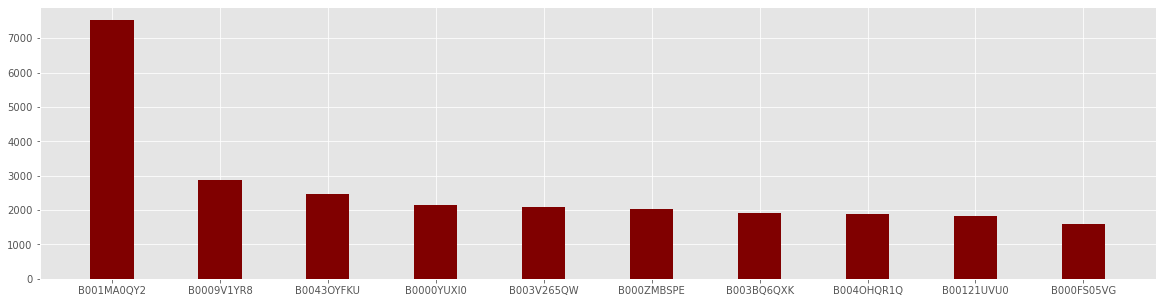

In [5]:
#most_popular.head(30).plot(kind = "bar")
fig = plt.figure(figsize = (20, 5))
 
# creating the bar plot
plt.bar(most_popular_top_10.ProductId, most_popular_top_10.Rating, color ='maroon',
        width = 0.4)
 

*** Analysis ***

The above graph gives us the most popular products (arranged in descending order) sold by the business.

For eaxmple, product, ID # B001MA0QY2 has sales of over 7000, the next most popular product, ID # B0009V1YR8 has sales of 3000, etc.

### <font color='Brown'>Recommendation System Part 2 </font>

**Model-based collaborative filtering system**

* Recommend items to users based on purchase history and similarity of ratings provided by other users who bought items to that of a particular customer.

* A model based collaborative filtering technique is chosen here as it helps in making predicting products for a particular user by identifying patterns based on preferences from multiple user data.

In [6]:
#Subsetting the Data
amazon_ratings1 = amazon_ratings.head(10000)
amazon_ratings1.head(4)

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800


**Utility Matrix based on products sold and user reviews**

* Utility Matrix : An utlity matrix is consists of all possible user-item preferences (ratings) details represented as a matrix. The utility matrix is sparse as none of the users would buy all teh items in the list, hence, most of the values are unknown.

In [7]:
#Creating the Utility Matrix
ratings_utility_matrix = amazon_ratings1.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
print("The Shape of ratings_utility_matrix-->"+str(ratings_utility_matrix.shape))
ratings_utility_matrix.head()

The Shape of ratings_utility_matrix-->(9697, 886)


ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As expected, the utility matrix obtaned above is sparse.

In [8]:
#Transposing the Matrix
X = ratings_utility_matrix.T
print("The shape of transposed matrix is" + str(X.shape))
X1 = X#Making a copy
X.head()

The shape of transposed matrix is(886, 9697)


UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Decomposing the Matrix

In [9]:
SVD = TruncatedSVD(n_components=10)#SVD = Singular Value Decomposition 
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

In [10]:
decomposed_matrix

array([[-5.62851611e-15,  1.10034130e-14,  4.56961720e-14, ...,
         1.76325713e-13, -1.05449175e-12,  1.48983151e-12],
       [ 2.19038626e-14,  9.97544809e-14, -2.56860960e-13, ...,
        -1.17474660e-11,  4.49650604e-12, -1.43403311e-11],
       [ 3.25949436e-16, -1.61635552e-15, -2.89371057e-15, ...,
        -7.42850491e-14,  1.35139030e-13, -6.31430905e-14],
       ...,
       [ 3.28573939e-06,  2.27949940e-01, -1.04100815e-02, ...,
        -3.68855924e-03, -6.26121403e-05, -4.90448781e-02],
       [ 1.30189940e-07,  8.38900811e-04, -1.50096751e-04, ...,
        -3.89334702e-04,  2.75560322e-04, -1.43416503e-02],
       [ 1.05872032e-04,  4.17991754e-01,  3.61382346e-01, ...,
        -3.38139264e-02, -4.42837375e-02,  2.70672212e-01]])

#### Building the Correlation Matrix

In [11]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

In [12]:
correlation_matrix

array([[ 1.        , -0.77419946, -0.79487388, ..., -0.1968203 ,
        -0.67063567,  0.30001233],
       [-0.77419946,  1.        ,  0.81300256, ...,  0.26027315,
         0.72356029,  0.201325  ],
       [-0.79487388,  0.81300256,  1.        , ...,  0.0674471 ,
         0.41335684, -0.06484479],
       ...,
       [-0.1968203 ,  0.26027315,  0.0674471 , ...,  1.        ,
         0.32500129,  0.12945616],
       [-0.67063567,  0.72356029,  0.41335684, ...,  0.32500129,
         1.        ,  0.19987308],
       [ 0.30001233,  0.201325  , -0.06484479, ...,  0.12945616,
         0.19987308,  1.        ]])

In [24]:
X.index[99]

'6117036094'

Isolating Product ID # 6117036094 from the Correlation Matrix


Assuming the customer buys Product ID # 6117036094 (randomly chosen)

In [13]:
i = "6117036094"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

99

In [26]:
product_ID

99

Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [15]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

In [27]:
correlation_product_ID

array([ 2.26919074e-01, -1.62302319e-01,  3.26624584e-01,  4.70310756e-01,
        6.36108878e-01, -7.05845032e-01, -7.26164826e-01,  6.49362490e-01,
       -7.05796242e-01, -8.37599116e-02, -7.26164826e-01, -1.21547016e-01,
       -7.27027656e-01, -7.09396397e-01, -7.05845032e-01, -7.26164826e-01,
       -7.26164826e-01,  6.34172949e-01, -7.27027901e-01,  2.07177436e-01,
       -3.57065572e-01, -6.84833025e-01, -7.29371945e-01, -1.28254051e-01,
       -3.41361770e-01, -6.54662585e-01, -6.40463561e-01, -7.08853770e-01,
       -1.28254051e-01, -6.65808077e-01, -6.68170264e-01, -7.05832265e-01,
       -7.21299136e-01, -6.55339220e-01, -1.22390330e-01, -7.05845032e-01,
       -6.55339220e-01,  5.07478960e-01, -7.05755742e-01, -7.08921081e-01,
       -7.08918955e-01, -6.54662585e-01, -7.05857816e-01, -7.05845032e-01,
       -7.05845032e-01, -7.05845032e-01, -1.28254051e-01, -7.05845032e-01,
       -7.05806635e-01, -7.08921081e-01,  5.16355691e-01, -4.87604396e-02,
       -5.42272499e-02, -

**Recommending top 10 highly correlated products in sequence**

In [22]:
Recommend = list(X.index[correlation_product_ID > 0.80])

In [23]:
# Removes the item already bought by the customer
Recommend.remove(i) 
Recommend[0:9]

['5357955972',
 '9788071198',
 '9788072208',
 '9790781946',
 '9790787006',
 '9790787626',
 '9790789564',
 '9790791798',
 '9790797818']

#### Summary

Product Id # Here are the top 10 products to be displayed by the recommendation system to the above customer based on the purchase history of other customers in the website.

### <font color='Brown'>Recommendation System Part 3 </font>

* For a business without any user-item purchase history, a search engine based recommendation system can be designed for users. The product recommendations can be based on textual clustering analysis given in product description.
* Dataset : Home Depot's dataset with product dataset.

In [28]:
# Importing libraries

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

**Item to item based recommendation system based on product description**
* Applicable when business is setting up its E-commerce website for the first time

In [29]:
product_descriptions =  pd.read_csv(os.path.join(input_path,'product_descriptions.csv'))
print("The shape of Product Descriptions is" + str(product_descriptions.shape))
product_descriptions.head(4)

The shape of Product Descriptions is(124428, 2)


,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...


In [30]:
# Missing values
product_descriptions = product_descriptions.dropna()
print("The shape of Product Descriptions is" + str(product_descriptions.shape))
product_descriptions.head()

The shape of Product Descriptions is(124428, 2)


,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [31]:
#Subsetting the Dataset
product_descriptions1 = product_descriptions.head(500)
product_descriptions1["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

**Feature extraction from product descriptions**
Converting the text in product description into numerical data for analysis

In [32]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

#### Visualizing product clusters in subset of data

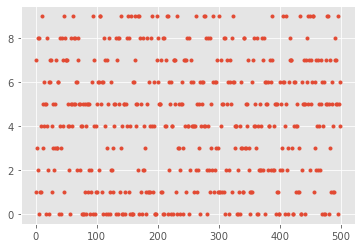

In [33]:
# Fitting K-Means to the dataset

X=X1
kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [34]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [35]:
# # Optimal clusters is 

true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 watering
 head
 shower
 plants
 stake
 sprinkler
 gal
 plastic
 miracle
 gro
Cluster 1:
 ft
 patio
 frame
 easy
 insulation
 fabric
 ladder
 steel
 resistant
 12
Cluster 2:
 storage
 shelves
 adjustable
 cutting
 easy
 shelf
 solid
 duty
 space
 lbs
Cluster 3:
 water
 brush
 concrete
 garage
 easy
 use
 ft
 california
 used
 paint
Cluster 4:
 toilet
 flush
 piece
 water
 design
 bowl
 tank
 filter
 features
 tile
Cluster 5:
 rug
 tape
 vary
 outdoor
 patterns
 indoor
 ft
 slightly
 window
 product
Cluster 6:
 air
 power
 snow
 cooling
 helps
 engine
 control
 blower
 unit
 protection
Cluster 7:
 bamboo
 natural
 panels
 wood
 fencing
 fence
 post
 ft
 treated
 quality
Cluster 8:
 light
 nickel
 watt
 finish
 led
 home
 bulb
 bulbs
 white
 fan
Cluster 9:
 metal
 steel
 screws
 drill
 screw
 20
 gauge
 hole
 tool
 use


In [36]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In [37]:
show_recommendations("cutting tool")

Cluster 2:
 storage
 shelves
 adjustable
 cutting
 easy
 shelf
 solid
 duty
 space
 lbs


In [38]:
show_recommendations("spray paint")

Cluster 3:
 water
 brush
 concrete
 garage
 easy
 use
 ft
 california
 used
 paint


In [39]:
show_recommendations("steel drill")

Cluster 9:
 metal
 steel
 screws
 drill
 screw
 20
 gauge
 hole
 tool
 use


In [ ]:
show_recommendations("water")

Once a cluster is identified based on the user's search words, the recommendation system can display items from the corresponding product clusters based on the product descriptions.